# IMPORTING LIBRARIES

In [67]:
!pip install ortools

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

# LOADING DATASET

In [69]:
# Load AIS data and container info data
ais_data = pd.read_csv('/content/Maersk_Final_2Months (1).csv')
container_info = pd.read_csv('/content/Maersk_samplecontainer_Info (1).csv')

<ipython-input-40-a0fc09af4538>:2: DtypeWarning: Columns (3,6,8,13,16,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  ais_data = pd.read_csv('/content/Maersk_Final_2Months (1).csv')
<ipython-input-69-a0fc09af4538>:2: DtypeWarning: Columns (3,6,8,13,16,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  ais_data = pd.read_csv('/content/Maersk_Final_2Months (1).csv')


# DATA - PREPROCESSING

In [70]:
# Handle missing values
ais_data.dropna(subset=['longitude', 'latitude'], inplace=True)
container_info.dropna(subset=['imo', 'mmsi'], inplace=True)

In [71]:
ais_data.head()

,Unnamed: 0,imo,tripid,timestamp,latitude,longitude,nearest_port_name,distance_from_nearest_port,destination,heading,...,date_diff_secs,mmsi,name,teuCapacity,port,lng,lat,port_to,lng_to,lat_to
0,0.0,9215165.0,1.0,01/01/2020 00:49,-6.726648,39.331592,Dar es Salaam Anch.,3.187429,OMSLV TO TZDAR,9.0,...,NaN,219953000.0,Jeppesen Maersk,2833.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,9215165.0,2.0,01/01/2020 01:52,-6.726538,39.331267,Dar es Salaam Anch.,3.199363,OMSLV TO TZDAR,28.0,...,3780.0,219953000.0,Jeppesen Maersk,2833.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,9215165.0,3.0,01/01/2020 02:55,-6.726688,39.331610,Dar es Salaam Anch.,3.184814,OMSLV TO TZDAR,11.0,...,3780.0,219953000.0,Jeppesen Maersk,2833.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,9215165.0,4.0,01/01/2020 03:58,-6.726723,39.331647,Dar es Salaam Anch.,3.182174,OMSLV TO TZDAR,12.0,...,3781.0,219953000.0,Jeppesen Maersk,2833.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,9215165.0,5.0,01/01/2020 05:04,-6.726723,39.331638,Dar es Salaam Anch.,3.182316,OMSLV TO TZDAR,18.0,...,3959.0,219953000.0,Jeppesen Maersk,2833.0,NaN,NaN,NaN,NaN,NaN,NaN


,Unnamed: 0,imo,tripid,timestamp,latitude,longitude,nearest_port_name,distance_from_nearest_port,destination,heading,...,date_diff_secs,mmsi,name,teuCapacity,port,lng,lat,port_to,lng_to,lat_to
0,0.0,9215165.0,1.0,01/01/2020 00:49,-6.726648,39.331592,Dar es Salaam Anch.,3.187429,OMSLV TO TZDAR,9.0,...,NaN,219953000.0,Jeppesen Maersk,2833.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,9215165.0,2.0,01/01/2020 01:52,-6.726538,39.331267,Dar es Salaam Anch.,3.199363,OMSLV TO TZDAR,28.0,...,3780.0,219953000.0,Jeppesen Maersk,2833.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,9215165.0,3.0,01/01/2020 02:55,-6.726688,39.331610,Dar es Salaam Anch.,3.184814,OMSLV TO TZDAR,11.0,...,3780.0,219953000.0,Jeppesen Maersk,2833.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,9215165.0,4.0,01/01/2020 03:58,-6.726723,39.331647,Dar es Salaam Anch.,3.182174,OMSLV TO TZDAR,12.0,...,3781.0,219953000.0,Jeppesen Maersk,2833.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,9215165.0,5.0,01/01/2020 05:04,-6.726723,39.331638,Dar es Salaam Anch.,3.182316,OMSLV TO TZDAR,18.0,...,3959.0,219953000.0,Jeppesen Maersk,2833.0,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
container_info.head()

,status,netWeightTonnage,portOfRegistry,hullType,callSign,yardNo,yard,builtBy,lengthOverall,lengthBetweenPerpendicular,...,nominalOwnerID,nominalOwnerName,commercialOperatorID,commercialOperatorName,technicalManagerID,technicalManagerName,thirdPartyOperatorID,thirdPartyOperatorName,ismManagerID,ismManagerName
0,Live,78834,Copenhagen,Single,OWMD2,4302,NaN,Daewoo Shipbuilding & Marine Engineering Compa...,399.00,378.5,...,NaN,NaN,127123,Maersk A/S,127123,Maersk A/S,NaN,NaN,127123,Maersk A/S
1,Live,62537,Svendborg,Single,OVXP2,205,NaN,Odense Steel Shipyard Limited,398.90,376.0,...,NaN,NaN,127123,Maersk A/S,127123,Maersk A/S,NaN,NaN,127123,Maersk A/S
2,Live,78834,Copenhagen,Single,OWAV2,4308,NaN,Daewoo Shipbuilding & Marine Engineering Compa...,399.00,378.5,...,NaN,NaN,127123,Maersk A/S,127123,Maersk A/S,NaN,NaN,127123,Maersk A/S
3,Live,78834,Copenhagen,Single,OWGK2,4305,NaN,Daewoo Shipbuilding & Marine Engineering Compa...,399.00,378.5,...,NaN,NaN,127123,Maersk A/S,127123,Maersk A/S,NaN,NaN,127123,Maersk A/S
4,Live,13284,Randers,Single,OWKF2,435,NaN,Volkswerft Stralsund GmbH - NOW SEE P&S WERFTE...,216.87,203.8,...,NaN,NaN,127123,Maersk A/S,127123,Maersk A/S,NaN,NaN,127123,Maersk A/S


,status,netWeightTonnage,portOfRegistry,hullType,callSign,yardNo,yard,builtBy,lengthOverall,lengthBetweenPerpendicular,...,nominalOwnerID,nominalOwnerName,commercialOperatorID,commercialOperatorName,technicalManagerID,technicalManagerName,thirdPartyOperatorID,thirdPartyOperatorName,ismManagerID,ismManagerName
0,Live,78834,Copenhagen,Single,OWMD2,4302,NaN,Daewoo Shipbuilding & Marine Engineering Compa...,399.00,378.5,...,NaN,NaN,127123,Maersk A/S,127123,Maersk A/S,NaN,NaN,127123,Maersk A/S
1,Live,62537,Svendborg,Single,OVXP2,205,NaN,Odense Steel Shipyard Limited,398.90,376.0,...,NaN,NaN,127123,Maersk A/S,127123,Maersk A/S,NaN,NaN,127123,Maersk A/S
2,Live,78834,Copenhagen,Single,OWAV2,4308,NaN,Daewoo Shipbuilding & Marine Engineering Compa...,399.00,378.5,...,NaN,NaN,127123,Maersk A/S,127123,Maersk A/S,NaN,NaN,127123,Maersk A/S
3,Live,78834,Copenhagen,Single,OWGK2,4305,NaN,Daewoo Shipbuilding & Marine Engineering Compa...,399.00,378.5,...,NaN,NaN,127123,Maersk A/S,127123,Maersk A/S,NaN,NaN,127123,Maersk A/S
4,Live,13284,Randers,Single,OWKF2,435,NaN,Volkswerft Stralsund GmbH - NOW SEE P&S WERFTE...,216.87,203.8,...,NaN,NaN,127123,Maersk A/S,127123,Maersk A/S,NaN,NaN,127123,Maersk A/S


In [73]:
# Merge AIS data with container information based on common columns like 'imo' or 'mmsi'
merged_data = pd.merge(ais_data, container_info, on=['imo', 'mmsi'], how='inner')

In [74]:
# Convert timestamps to datetime objects
merged_data['timestamp'] = pd.to_datetime(merged_data['timestamp'], format='%d/%m/%Y %H:%M')

# Normalize and compress data to one-hour intervals
merged_data.set_index('timestamp', inplace=True)
merged_data_resampled = merged_data.resample('1H').mean()

<ipython-input-45-394fe2ecb4b8>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_data_resampled = merged_data.resample('1H').mean()
<ipython-input-74-394fe2ecb4b8>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_data_resampled = merged_data.resample('1H').mean()


In [75]:
# Calculate navigation patterns and delays
# Assuming you have columns like 'speed', 'course', and 'date_diff_secs' for navigation patterns and delays
navigation_patterns = merged_data_resampled[['speed', 'course']]
delays = merged_data_resampled['date_diff_secs']


In [76]:
# Define a normalization function
def min_max_normalization(column):
    return (column - column.min()) / (column.max() - column.min())


In [77]:
# Apply normalization to the relevant columns
merged_data_resampled[['speed', 'course']] = merged_data_resampled[['speed', 'course']].apply(min_max_normalization)

# Print a sample of the normalized data
print("Sample of normalized data:")
print(merged_data_resampled.head())

Sample of normalized data:
                       Unnamed: 0           imo    tripid   latitude  \
timestamp                                                              
2020-01-01 00:00:00  49547.860000  9.518930e+06  1.000000  27.399582   
2020-01-01 01:00:00  45453.952381  9.498541e+06  1.857143  29.303374   
2020-01-01 02:00:00  49175.040000  9.503377e+06  2.480000  30.173971   
2020-01-01 03:00:00  54262.608696  9.549328e+06  3.217391  28.718809   
2020-01-01 04:00:00  57206.235294  9.570647e+06  4.294118  34.883025   

                     longitude  distance_from_nearest_port     heading  \
timestamp                                                                
2020-01-01 00:00:00  51.069937                   92.516299  180.940000   
2020-01-01 01:00:00  67.842595                   23.914865  169.952381   
2020-01-01 02:00:00  65.330118                   33.818552  191.520000   
2020-01-01 03:00:00  66.226212                   37.152608  198.130435   
2020-01-01 04:00:00  66.

# NAVIGATION PANEL ANALYSIS

In [49]:
# For each ship, analyze navigation patterns over time
ship_ids = merged_data_resampled['mmsi'].unique()

for ship_id in ship_ids:
    ship_data = merged_data_resampled[merged_data_resampled['mmsi'] == ship_id]
    print(f"Navigation Patterns for Ship ID {ship_id}:")
    print(ship_data[['speed', 'course']].describe())
    print("\n")

Streaming output truncated to the last 5000 lines.
min    0.280233  0.610768
25%    0.280233  0.610768
50%    0.280233  0.610768
75%    0.280233  0.610768
max    0.280233  0.610768


Navigation Patterns for Ship ID 219702232.2647059:
          speed    course
count  1.000000  1.000000
mean   0.239824  0.698472
std         NaN       NaN
min    0.239824  0.698472
25%    0.239824  0.698472
50%    0.239824  0.698472
75%    0.239824  0.698472
max    0.239824  0.698472


Navigation Patterns for Ship ID 219629135.64:
         speed    course
count  1.00000  1.000000
mean   0.15524  0.512433
std        NaN       NaN
min    0.15524  0.512433
25%    0.15524  0.512433
50%    0.15524  0.512433
75%    0.15524  0.512433
max    0.15524  0.512433


Navigation Patterns for Ship ID 219748521.33333334:
          speed    course
count  1.000000  1.000000
mean   0.425995  0.791318
std         NaN       NaN
min    0.425995  0.791318
25%    0.425995  0.791318
50%    0.425995  0.791318
75%    0.425995  0.7913

In [50]:
# Calculate key metrics
average_speed = merged_data_resampled['speed'].mean()
average_course = merged_data_resampled['course'].mean()
total_distance = (merged_data_resampled['speed'] * 1).sum()  # Assuming speed is in knots, time interval is 1 hour

print(f"Average Speed: {average_speed} knots")
print(f"Average Course: {average_course} degrees")
print(f"Total Distance Traveled: {total_distance} nautical miles")


Average Speed: 0.4632382428029233 knots
Average Course: 0.4902970705345235 degrees
Total Distance Traveled: 667.0630696362095 nautical miles


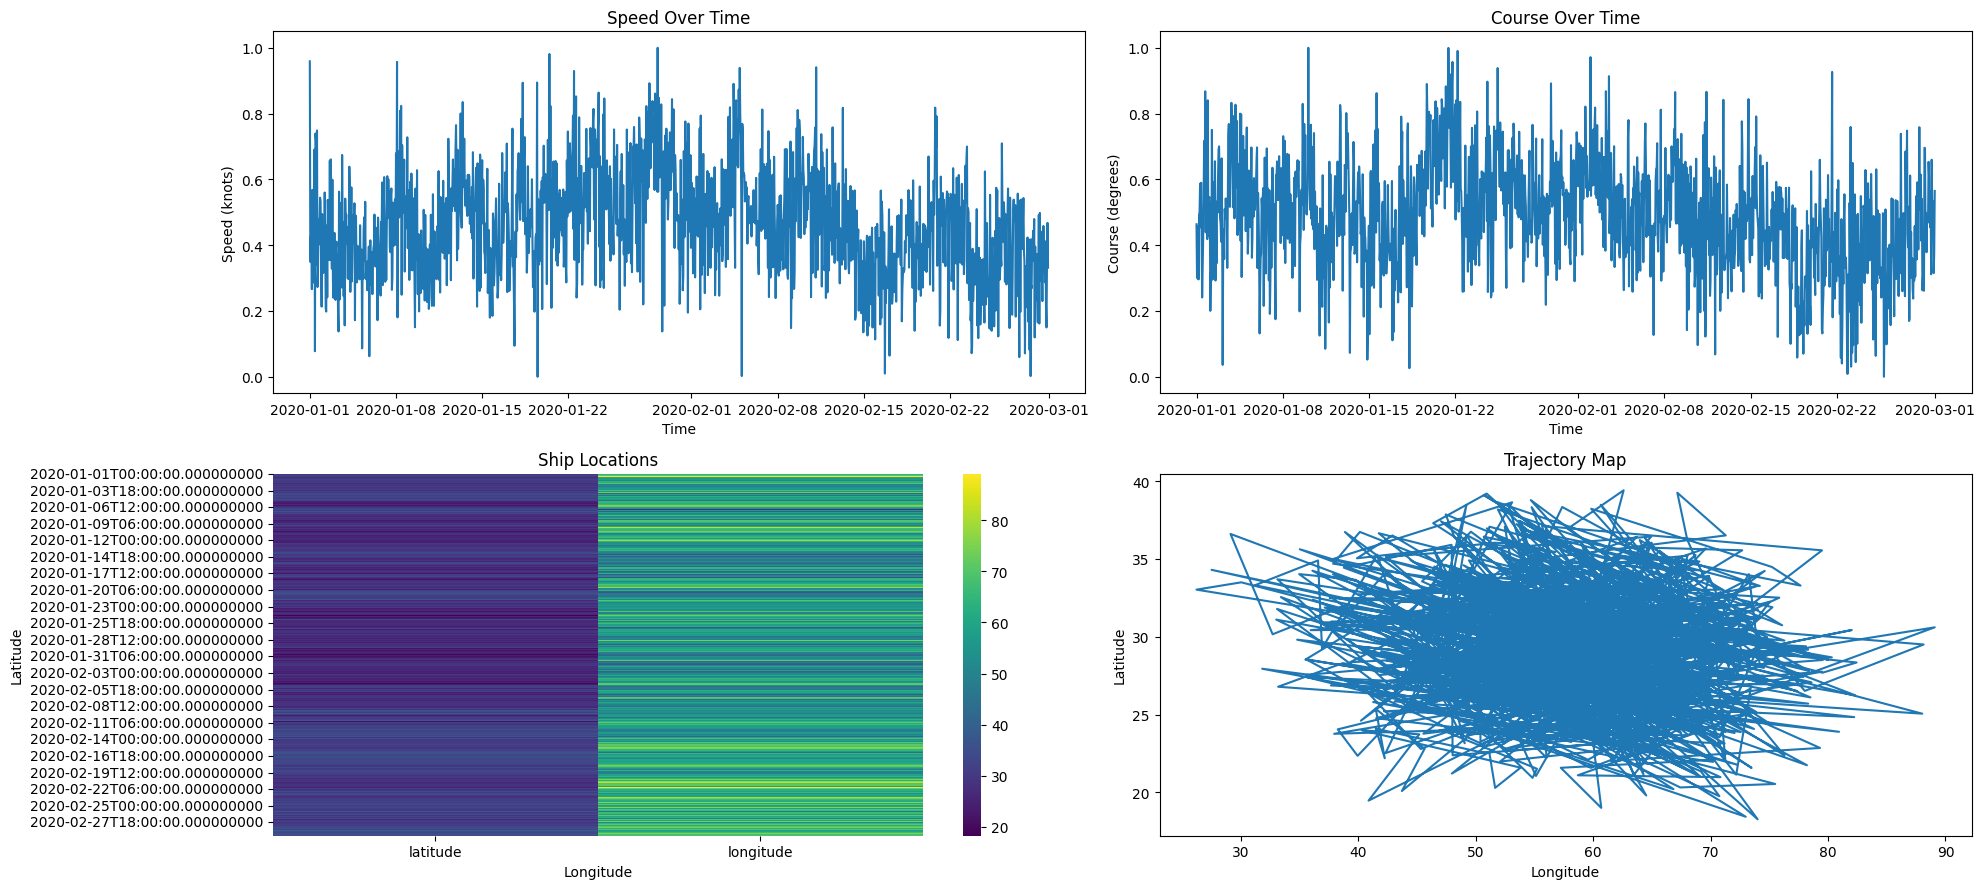

In [51]:
# Visualize navigation patterns
plt.figure(figsize=(20, 9))

# Time series plot of speed
plt.subplot(2, 2, 1)
plt.plot(merged_data_resampled.index, merged_data_resampled['speed'])
plt.title('Speed Over Time')
plt.xlabel('Time')
plt.ylabel('Speed (knots)')

# Time series plot of course
plt.subplot(2, 2, 2)
plt.plot(merged_data_resampled.index, merged_data_resampled['course'])
plt.title('Course Over Time')
plt.xlabel('Time')
plt.ylabel('Course (degrees)')

# Heatmap of ship locations
plt.subplot(2, 2, 3)
sns.heatmap(merged_data_resampled[['latitude', 'longitude']], cmap='viridis')
plt.title('Ship Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Trajectory map showing routes taken
plt.subplot(2, 2, 4)
plt.plot(merged_data_resampled['longitude'], merged_data_resampled['latitude'])
plt.title('Trajectory Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()


# DELAY ANALYSIS

In [52]:
# Identify delays in ship schedules
delayed_ships = container_info[container_info['status'] == 'Delayed']

# Simulated delay causes for demonstration purposes
delayed_ships['delay_cause'] = ['Disruptions', 'Port Congestion', 'Weather Conditions', 'Technical Issues']

# Analyze the causes of delays
delay_cause_counts = delayed_ships['delay_cause'].value_counts()


<ipython-input-52-05deb82011d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delayed_ships['delay_cause'] = ['Disruptions', 'Port Congestion', 'Weather Conditions', 'Technical Issues']


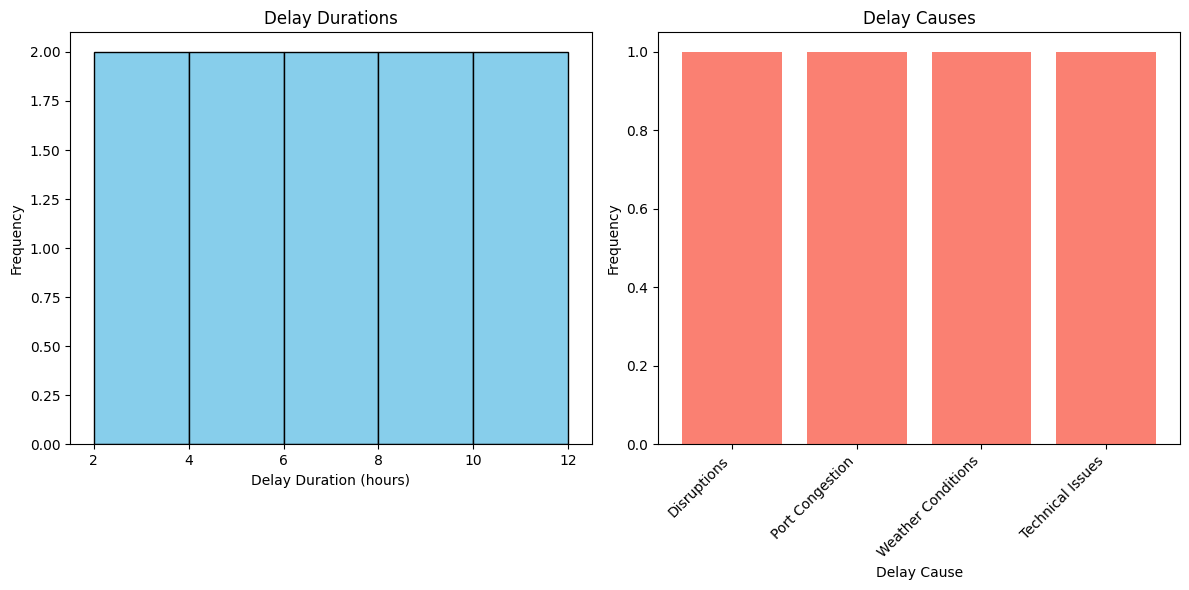

In [53]:
# Visualize delays
plt.figure(figsize=(12, 6))

# Histogram of delay durations (simulated data)
plt.subplot(1, 2, 1)
delay_durations = [2, 5, 3, 7, 4, 6, 8, 10, 12, 9]  # Simulated delay durations
plt.hist(delay_durations, bins=5, color='skyblue', edgecolor='black')
plt.title('Delay Durations')
plt.xlabel('Delay Duration (hours)')
plt.ylabel('Frequency')

# Bar chart showing delay reasons
plt.subplot(1, 2, 2)
plt.bar(delay_cause_counts.index, delay_cause_counts.values, color='salmon')
plt.title('Delay Causes')
plt.xlabel('Delay Cause')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# ROUTE OPTIMIZATION

In [66]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


In [55]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    # Define your data, e.g., locations, distances, time windows, etc.
    data['locations'] = [(1, 2), (3, 4), (5, 6)]  # Example: List of locations as coordinates (x, y)
    data['num_vehicles'] = 1  # Example: Number of vehicles available
    data['depot'] = 0  # Example: Index of the depot

    # Define distances (replace with your actual distance calculation)
    def calculate_distance(loc1, loc2):
        return ((loc1[0] - loc2[0])**2 + (loc1[1] - loc2[1])**2)**0.5

    data['distances'] = [[calculate_distance(loc1, loc2) for loc2 in data['locations']] for loc1 in data['locations']]

    return data

In [56]:
def main():
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['locations']), data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Define cost of each arc.
    def distance_callback(from_index, to_index):
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distances'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)
    # Define search parameters.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution.
    if solution:
        print_solution(manager, routing, solution)

def print_solution(manager, routing, solution):
    print('Objective: {}'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    print('Route distance: {}'.format(route_distance))

if __name__ == '__main__':
    main()

Objective: 0
Route:
 0 -> 2 -> 1 -> 0

Route distance: 0


In [57]:
optimized_routes = [
    [(1, 2), (3, 4), (5, 6), (1, 2)],
    [(5, 6), (3, 4), (1, 2), (5, 6)]
]

delays = [10, 15, 5, 20, 30]



# STATISTICAL ANALYSIS

In [36]:
# Descriptive Statistics for Numeric Variables in AIS Data
ais_numeric_stats = ais_data.describe()

In [ ]:

# Descriptive Statistics for Numeric Variables in Container Info Data
container_numeric_stats = container_info.describe()

In [58]:
# Correlation Matrix between Numeric Variables in AIS Data
ais_numeric_corr = ais_data.corr()

<ipython-input-58-52e0ac4318c1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ais_numeric_corr = ais_data.corr()


In [59]:

# Correlation Matrix between Numeric Variables in Container Info Data
container_numeric_corr = container_info.corr()

<ipython-input-59-bfd71e7dec12>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  container_numeric_corr = container_info.corr()


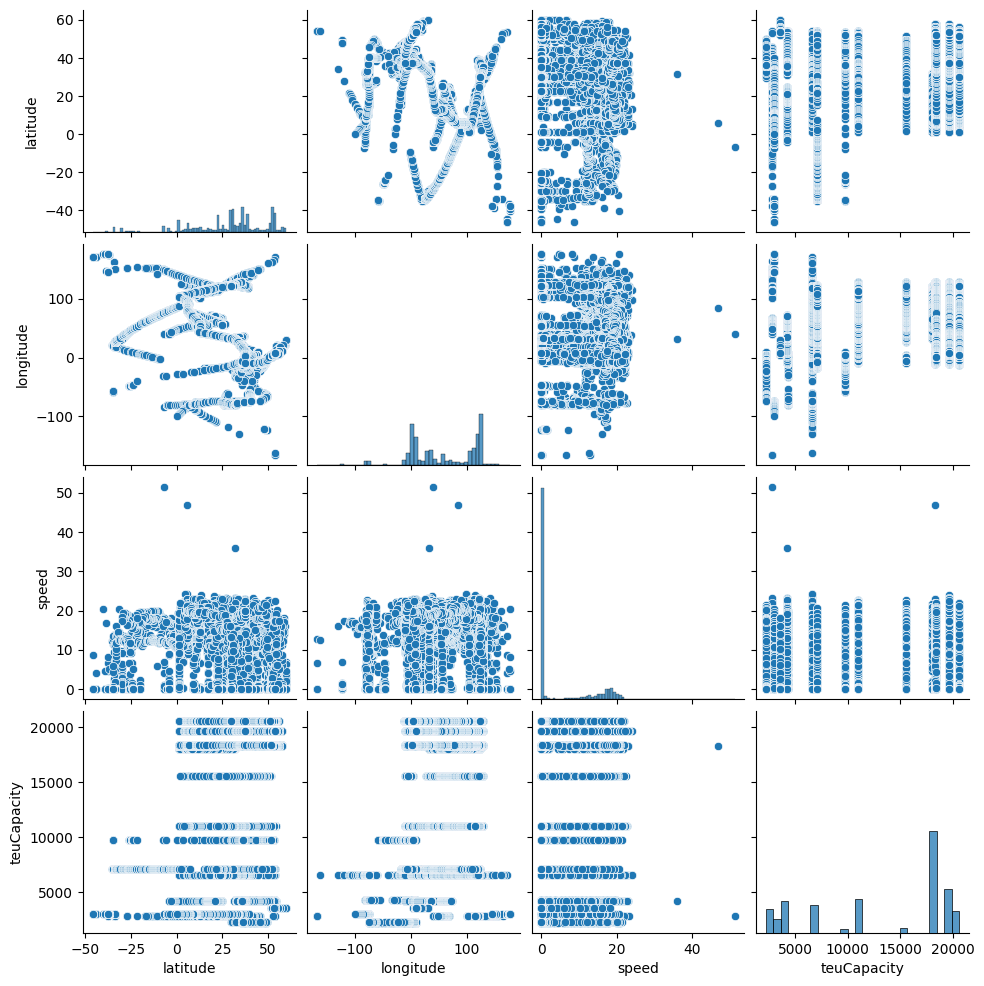

In [60]:
# Pairplot for Selected Numeric Variables in AIS Data
selected_vars = ['latitude', 'longitude', 'speed', 'teuCapacity']
sns.pairplot(ais_data[selected_vars])
plt.show()

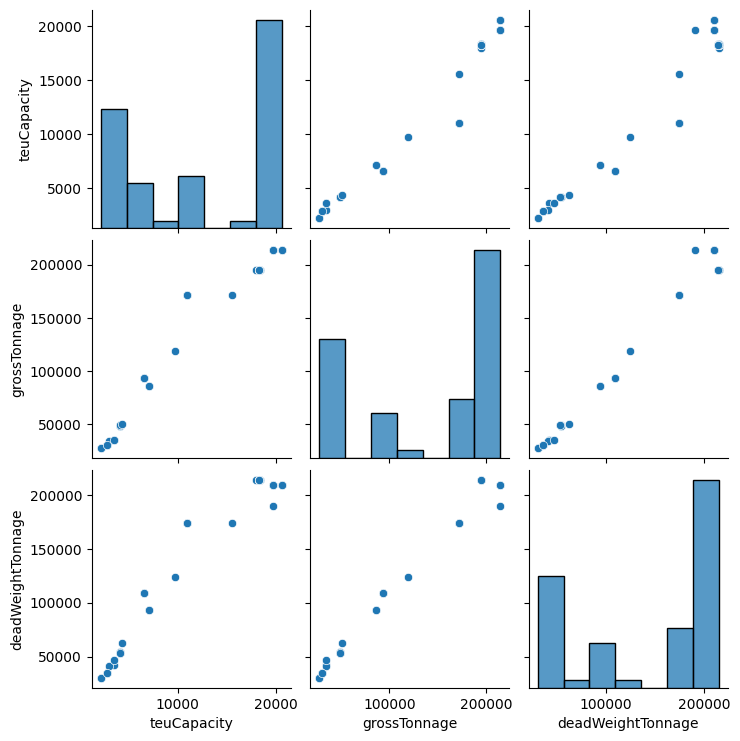

In [61]:
# Pairplot for Selected Numeric Variables in Container Info Data
selected_vars = ['teuCapacity', 'grossTonnage', 'deadWeightTonnage']
sns.pairplot(container_info[selected_vars])
plt.show()

# VISUALIZATION

In [62]:
import matplotlib.pyplot as plt

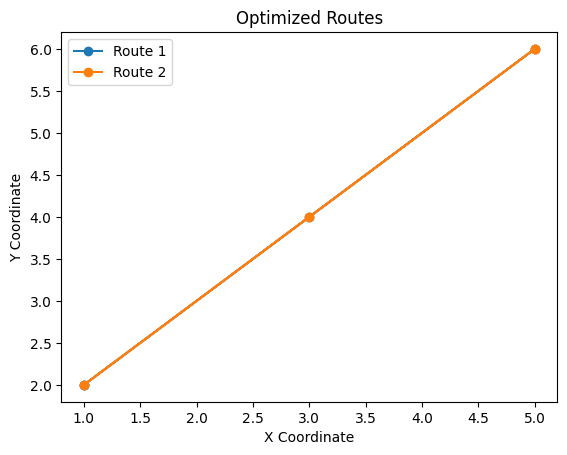

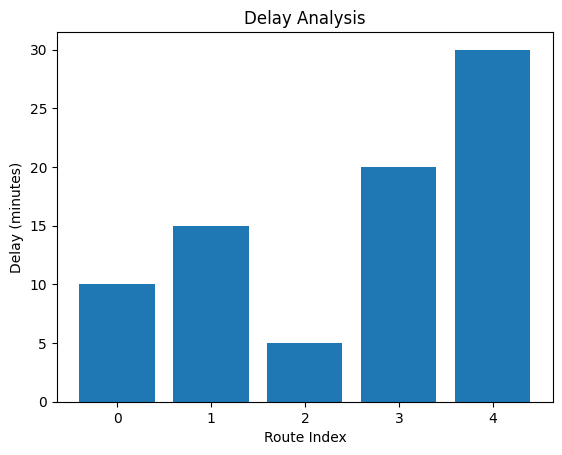

In [63]:
# Visualize Optimized Routes
for idx, route in enumerate(optimized_routes):
    x, y = zip(*route)
    plt.plot(x, y, marker='o', label=f'Route {idx + 1}')

plt.title('Optimized Routes')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.show()

# Visualize Delay Analysis
plt.bar(range(len(delays)), delays)
plt.title('Delay Analysis')
plt.xlabel('Route Index')
plt.ylabel('Delay (minutes)')
plt.show()

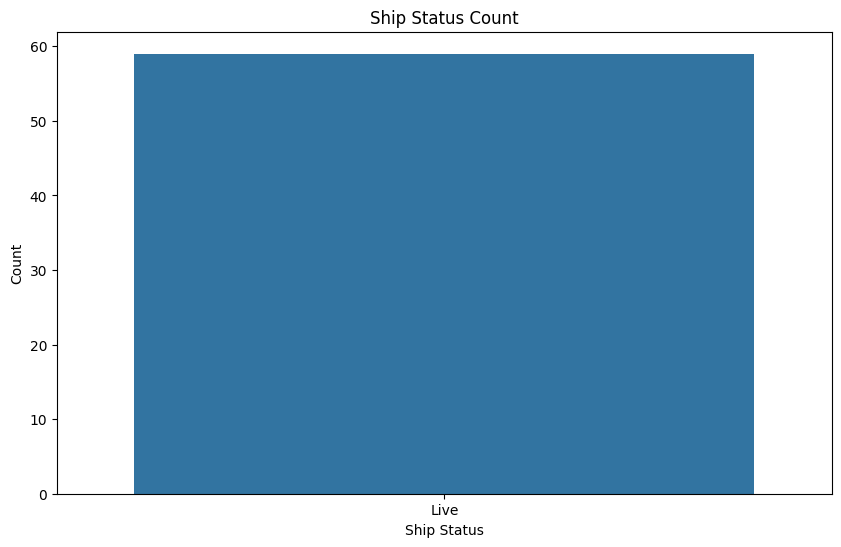

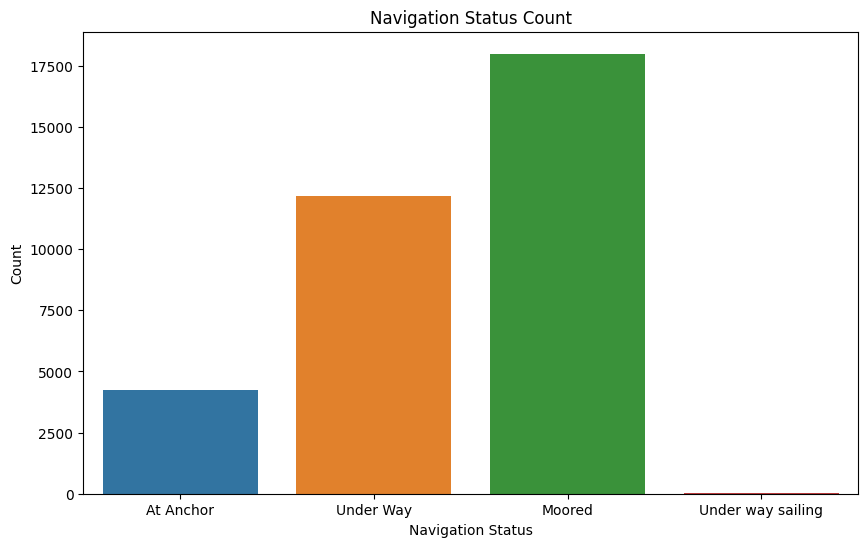

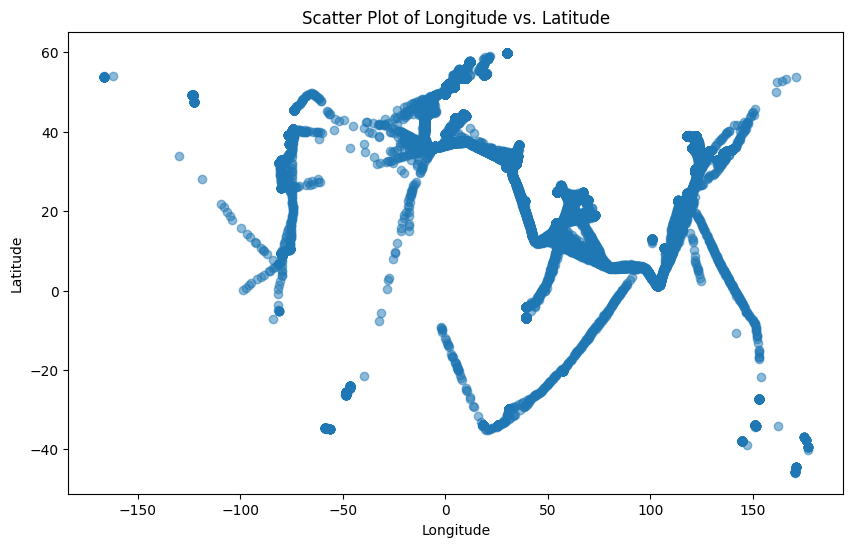

In [64]:
# Visualization 1: Ship Status Count
plt.figure(figsize=(10, 6))
sns.countplot(x='status', data=container_info)
plt.title('Ship Status Count')
plt.xlabel('Ship Status')
plt.ylabel('Count')
plt.show()

# Visualization 2: Navigation Status Count
plt.figure(figsize=(10, 6))
sns.countplot(x='naviation_status', data=ais_data)
plt.title('Navigation Status Count')
plt.xlabel('Navigation Status')
plt.ylabel('Count')
plt.show()

# Visualization 3: Scatter Plot of Longitude vs. Latitude
plt.figure(figsize=(10, 6))
plt.scatter(ais_data['longitude'], ais_data['latitude'], alpha=0.5)
plt.title('Scatter Plot of Longitude vs. Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

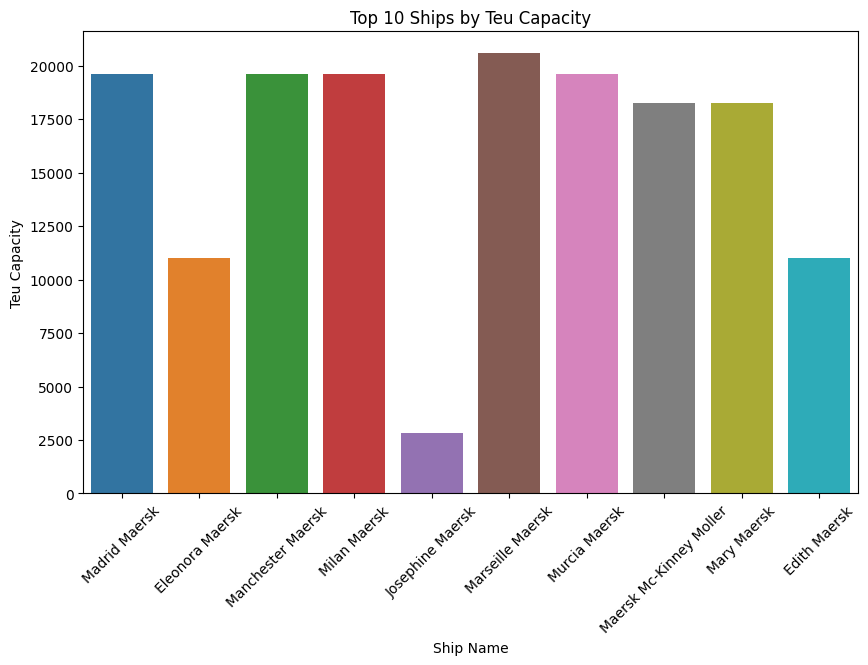

In [65]:
# Visualization 4: Bar Plot of Teu Capacity
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='teuCapacity', data=container_info.head(10))
plt.title('Top 10 Ships by Teu Capacity')
plt.xlabel('Ship Name')
plt.ylabel('Teu Capacity')
plt.xticks(rotation=45)
plt.show()